### **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import cleaning as cl   
import transforming as tr
import sys
sys.path.append('../model_training/')
from xgb_model import XGBModel

# **DATA UNDERSTANDING**

### **CV'S PATHS**

In [2]:
paths = {
    "pacientes": '../../data/raw_2/pacientes_data.csv',
    "caqueta": '../../data/raw/caqueta_data.csv',
    "narino": '../../data/raw/Narino_data.csv',
    "putumayo": '../../data/raw/Putumayo_data.csv',
    "caqueta_2": '../../data/raw_2/caqueta_data_2.csv',
    "narino_2": '../../data/raw_2/Narino_data_2.csv',
    "putumayo_2": '../../data/raw_2/Putumayo_data_2.csv',
}

### **READ AND NAME CSV'S**

In [3]:
pacientes_df = pd.read_csv(paths["pacientes"], low_memory=False)
caqueta_df = pd.read_csv(paths["caqueta"], low_memory=False)
narino_df = pd.read_csv(paths["narino"], low_memory=False)
putumayo_df = pd.read_csv(paths["putumayo"], low_memory=False)
caqueta_df_2 = pd.read_csv(paths["caqueta_2"], low_memory=False)
narino_df_2 = pd.read_csv(paths["narino_2"], low_memory=False)
putumayo_df_2 = pd.read_csv(paths["putumayo_2"], low_memory=False)

caqueta_df.name = 'caqueta'
pacientes_df.name = 'pacientes'
narino_df.name = 'narino'
putumayo_df.name = 'putumayo'
caqueta_df_2.name = 'caqueta_2'
narino_df_2.name = 'narino_2'
putumayo_df_2.name = 'putumayo_2'

# **BEFORE CLEANING**

### **COLUMNS**

In [4]:
print("caqueta: ", list(caqueta_df_2))
print("narino: ", list(narino_df_2))
print("putumayo: ", list(putumayo_df_2))

caqueta:  ['Año', 'Mes', 'Grupo de Riesgo', 'Programa', 'Evento', 'Afiliados', 'OrigenBD', 'CodDepto', 'DesDepto', 'CodMpio', 'DescMpio', 'Latitud_Y_Mpio', 'Longitud_X_Mpio', 'tipo_usuario', 'Estado', 'FechaNovedadFallecido', 'tipo_identifiCAcion', 'Documento', 'ConCAtenar', 'nombre1', 'nombre2', 'apellido1', 'apellido2', 'FechaNac', 'Edad', 'CiclosV', 'DescrCiclosV', 'QuinQ', 'DescQuinQ', 'Género', 'Cod_Género', 'EnfoqueDif', 'Hecho Victimizante', 'RUV', 'Nivel_Educativo', 'Ocupación', 'Tipo de afiliado', 'Estado_Civil', 'Discapacidad', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Grado de Discapacidad', 'Pertenencia Étnica', 'MUNICIPIO DONDE VIVE', 'DIRECCIÓN DE DONDE VIVE', 'TELEFONOS DE CONTACTO', 'Zona', 'Cód_poblado', 'Nombre_poblado', 'Latitud_Afiliado', 'Longitud_Afiliado', 'Validación_Dirección_Afiliado', 'CodDepto_IPS', 'DesDepto_IPS', 'CodMpio_IPS', 'DescMpio_IPS', 'CodIPS', 'Nombre_IPS', 'Dirección_IPS', 'Barrio_IPS', 'Teléfono_IPS', 'Latitud_IPS', 'Longitud_IPS', 

In [5]:
def comparable_info(df1, df2):
    fig, axes = plt.subplots(2, 1, figsize=(16, 6))
    fig.suptitle("Missigness comparison")
    print("*************** {} ***************".format(df1.name))
    print(df1.info())
    print(df1.describe(include="all").T)

    msno.matrix(df1, ax=axes[0], sparkline=False)
    axes[0].set_title(("Missing Values Matrix for {}".format(df1.name)))

    print("*************** {} ***************".format(df2.name))
    print(df2.info())
    print(df2.describe(include="all").T)

    msno.matrix(df2, ax=axes[1], sparkline=False)
    axes[1].set_title(("Missing Values Matrix for {}".format(df2.name)))

    plt.show()


### **INFO CAQUETÁ**

*************** caqueta ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Columns: 150 entries, Año to Complicación Renales
dtypes: float64(95), int64(12), object(43)
memory usage: 2.1+ MB
None
                          count unique  \
Año                      1861.0    NaN   
Mes                      1861.0    NaN   
Grupo de Riesgo            1861      1   
Programa                   1861      1   
Evento                     1861      1   
...                         ...    ...   
Complicación Cardiaca       0.0    NaN   
Complicación Cerebral       0.0    NaN   
Complicación Retinianas     0.0    NaN   
Complicación Vascular       0.0    NaN   
Complicación Renales        0.0    NaN   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Po

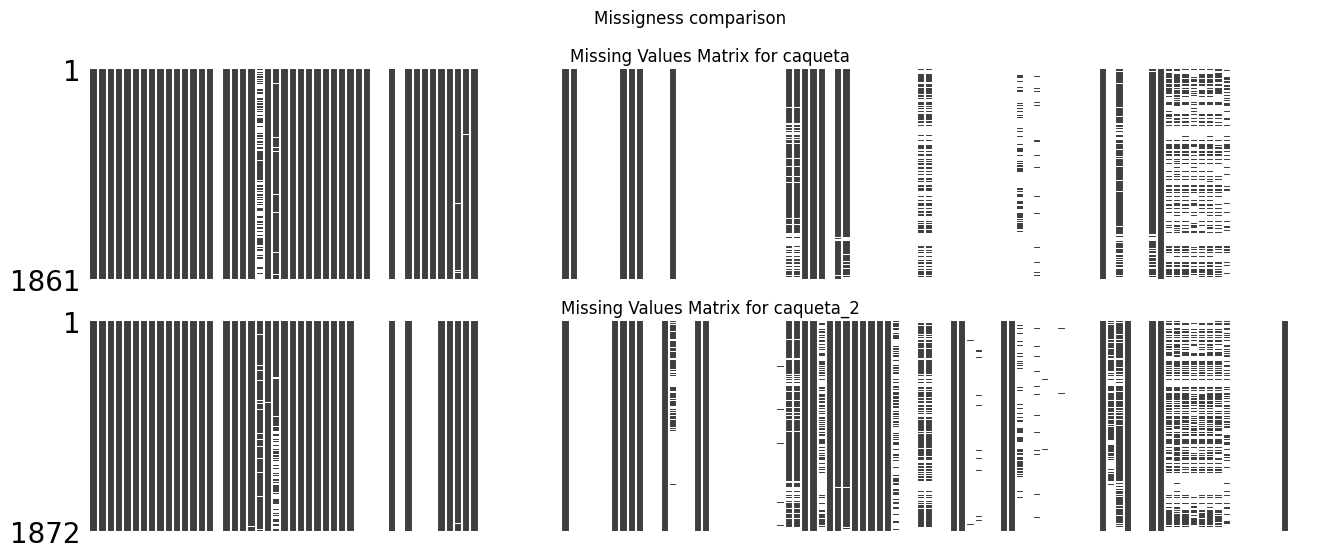

In [6]:
comparable_info(caqueta_df,caqueta_df_2)


### **INFO NARIÑO**

*************** narino ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Columns: 161 entries, Año to REPETIDO
dtypes: float64(44), int64(18), object(99)
memory usage: 5.5+ MB
None
                          count unique  \
Año                      4441.0    NaN   
Mes                      4441.0    NaN   
Grupo de Riesgo            4441      1   
Programa                   4441      1   
Evento                     4441      7   
...                         ...    ...   
Complicación Cerebral      4441      3   
Complicación Retinianas    4441      3   
Complicación Vascular      4441      3   
Complicación Renales       4441      3   
REPETIDO                    0.0    NaN   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Población con r

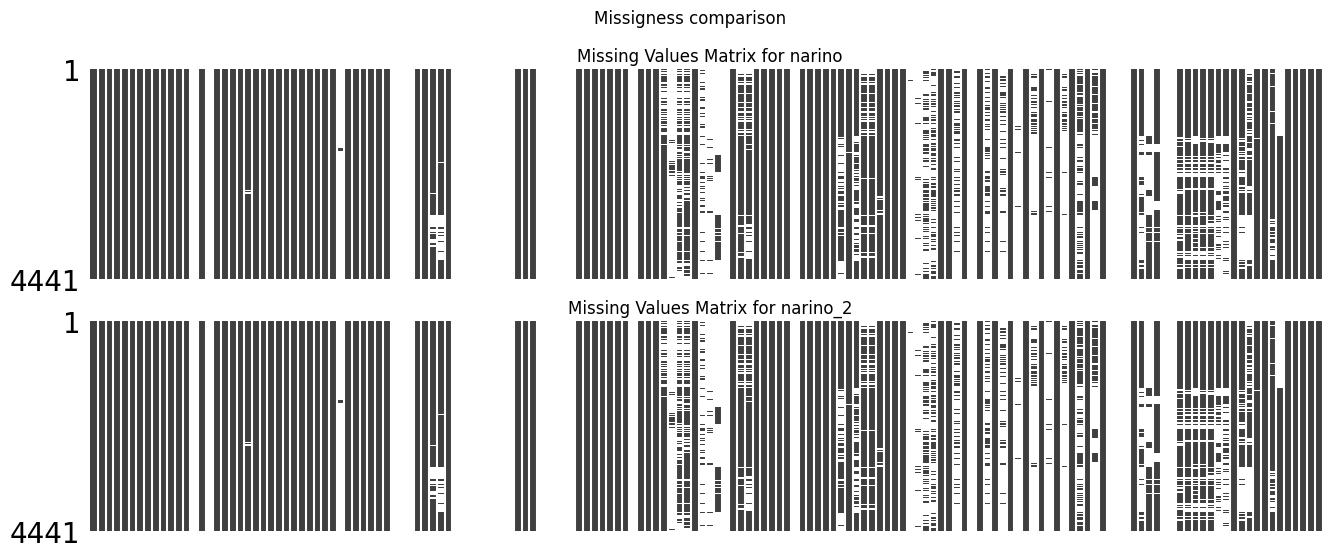

In [7]:
comparable_info(narino_df,narino_df_2)


### **INFO PUTUMAYO**

*************** putumayo ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Columns: 177 entries, Año to OBSERVACIONES
dtypes: float64(39), int64(16), object(122)
memory usage: 1.2+ MB
None
                         count unique  \
Año                      856.0    NaN   
Mes                      856.0    NaN   
Grupo de Riesgo            856      1   
Programa                   856      1   
Evento                     856      5   
...                        ...    ...   
Complicación Cerebral      856      5   
Complicación Retinianas    856      4   
Complicación Vascular      856      3   
Complicación Renales       856      4   
OBSERVACIONES               94     42   

                                                                       top  \
Año                                                                    NaN   
Mes                                                                    NaN   
Grupo de Riesgo          Población con riesgo 

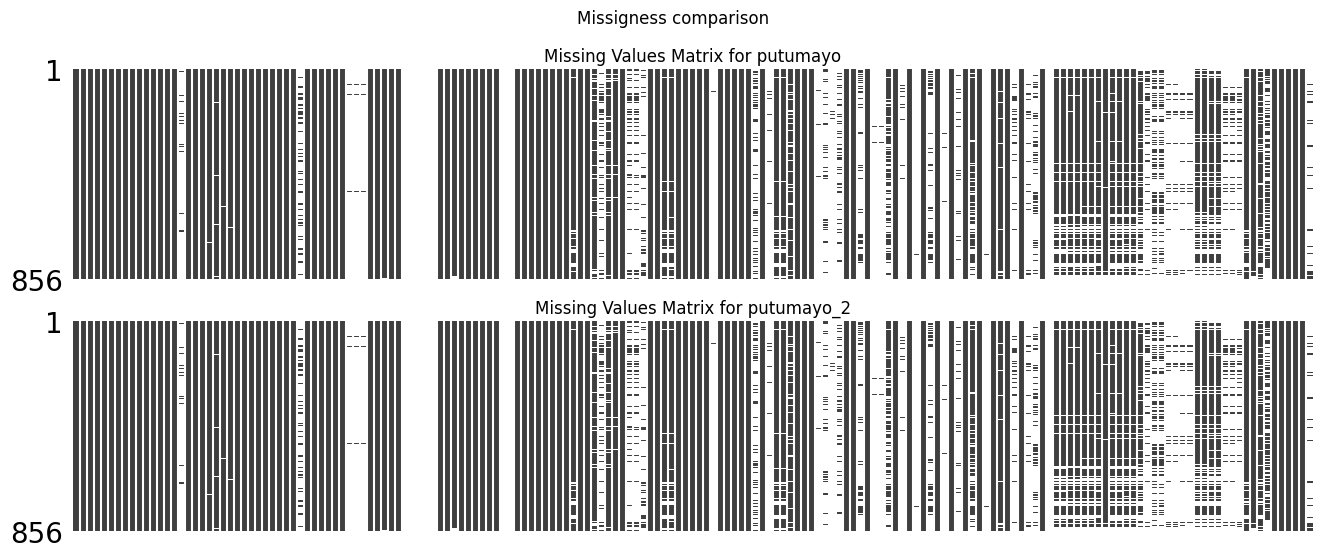

In [8]:
comparable_info(putumayo_df,putumayo_df_2)

### **INFO PACIENTS**

*************** pacientes ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65819 entries, 0 to 65818
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Afiliado               65819 non-null  object 
 1   Región                    65819 non-null  object 
 2   UT                        65819 non-null  object 
 3   Primer Nombre             65819 non-null  object 
 4   Segundo Nombre            53684 non-null  object 
 5   Primer Apellido           65819 non-null  object 
 6   Segundo Apellido          63451 non-null  object 
 7   Tipo de Documento         65819 non-null  object 
 8   Número de Documento       65819 non-null  int64  
 9   Celular                   26129 non-null  object 
 10  Correo                    8197 non-null   object 
 11  Sexo                      65819 non-null  object 
 12  Fecha de Afiliación       65819 non-null  object 
 13  Fecha Nacimiento   

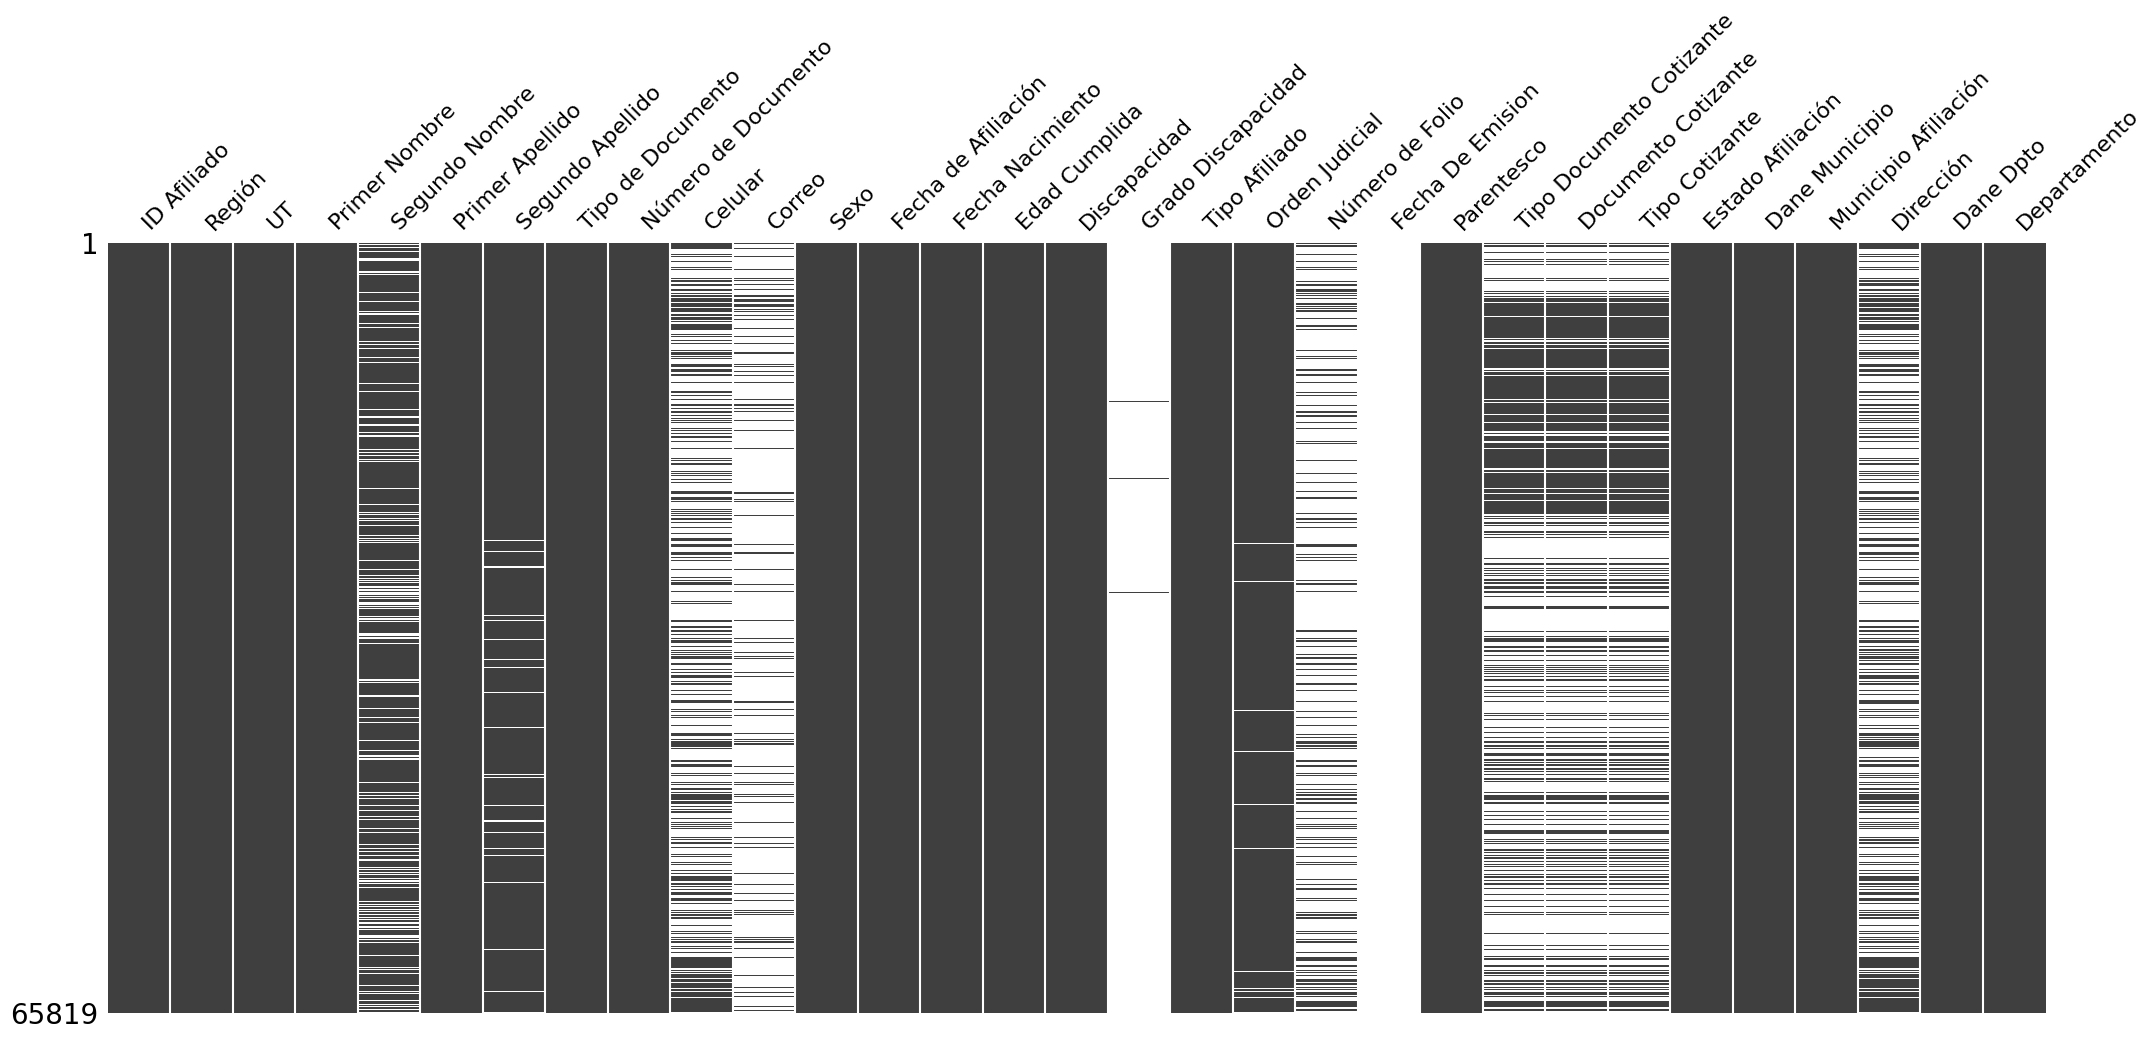

In [9]:
msno.matrix(pacientes_df, sparkline=False)
print("*************** {} ***************".format(pacientes_df.name))
print(pacientes_df.info())
print(pacientes_df.describe(include="all").T)

# **Data Preparation**

### **DATA PREPARATION SETUP**

In [10]:
saving_paths = {
    "transformed_data": '../../data/processed/transformed_data',
    "clean_data": '../../data/processed/cleaned_data/Cleaned_data.csv'
}

cl = cl.Cleaning(saving_paths["clean_data"])
tr = tr.Transform(saving_paths["clean_data"], saving_paths["transformed_data"])

In [11]:
cl.run()
unified_df = cl.get_unified_df()
unified_df = unified_df.replace({'NAN': np.nan})
unified_df.name = 'unified df'
df_clean = cl.get_df_clean()
df_clean = df_clean.replace({'NAN': np.nan})
df_clean.name = 'clean df'

------------------------------------------------
Cleaning...
Unique values in column:
**['NO APLICA' 'ASA' 'EXFORGE+VALSARTAN' 'DAPAGLIFOXINA+METFORMINA'
 'METOPROLOL+ASA+ROSUVASTATINA+ACIDO FENOFIBRICO' 'LOSARTAN' 'CARVEDILOL'
 'DILTIAZEM+ASA' 'RETIRADO' 'FUROSEMIDA' 'METOPROLOL' 'AMLODIPINO'
 'ENALAPRIL+ATORVASTATINA+ASA' 'QUINAPRIL' 'VALSARTAN' 'CLONIDINA'
 'FUROSEMIDA+ESPIRONOLACTONA' 'CLORTALIDONA' 'NIFEDIPINO+ASA+METOPROLOL'
 'ESPIRINOLACTINA+CARVEDILOL' 'VERAPAMILO+ASA' 'OLMETEC'
 'METOPROLOL+AMLODIPINO' 'METOPROLOL+NIMODIFPINO' 'PROPANOLOL+VALSARTAN'
 'SACUBITRILO+VVALSARTAN' 'BISOPROLOL' 'GENGIBROZILO+FENOFIBRATO'
 'NIFEDIPINO' 'VERAPAMILO' 'ASA+ESPIRINOLACTONA' 'ALOPURINOL' 'IECA+HCTZ'
 'ASA+FUROSEMIDA+METOPROLOL' 'ASA+ATORVASTATINA' 'DAPAGLIFLOZINA'
 'RIVAROXON' 'ALOPERIDOL+ATORVASTATINA+MELOXICAN' 'GEMFIBROZILO'
 'GENFIBROZILO+ATROVASTATINA+EZOMEPRAZOL' 'LEVOTIROXINA' 'ROSUVASTATINA'
 'METFORMINA+ROSUVASTATIBNA' 'NIFEDIPINO+ENALAPRIL' 'ATORVASRTATINA'
 'ATORVASTATINA' 'VIDA

### **UNIFIED DATA DRAME**

*************** unified df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7169 entries, 0 to 1871
Data columns (total 57 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Grupo de Riesgo                                                     7169 non-null   object
 1   CodDepto                                                            7169 non-null   object
 2   FechaNovedadFallecido                                               7169 non-null   object
 3   Edad                                                                7168 non-null   object
 4   Cod_Género                                                          7169 non-null   object
 5   Tipo de Discapacidad                                                7169 non-null   object
 6   Condición de Discapacidad                                           7169 non-

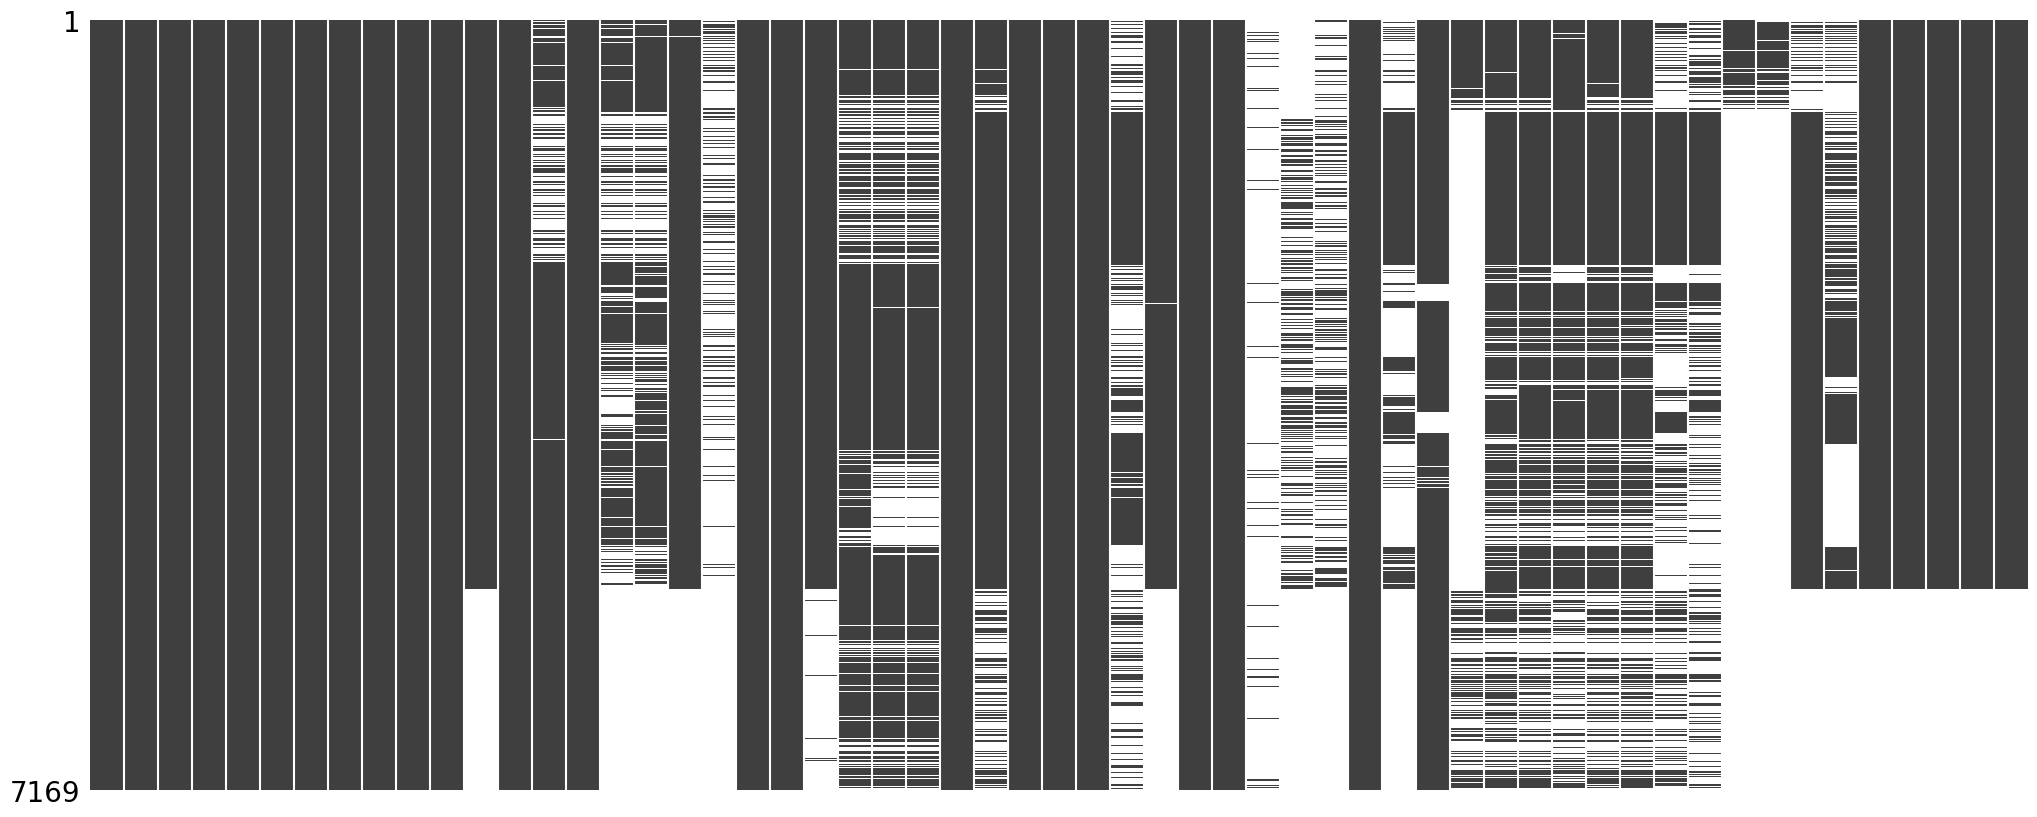

In [12]:
msno.matrix(unified_df, sparkline=False)
print("*************** {} ***************".format(unified_df.name))
print(unified_df.info())
print(unified_df.describe(include="all").T)

### **Colums before fixing**

In [13]:
def print_col_info(df,columns):
    for col in columns:
        pd.set_option('display.max_rows', None)
        print("\n********************************************************************************")
        print("Column: {}".format(col))
        print("Unique values in {} column:".format(col))
        print(df[col].unique())
        print("Total Unique values:")
        print(len(df[col].unique()))
        print("Value counts for {} column:".format(col))
        print(df[col].value_counts())
        print("Data type of {} column:".format(col))
        print(df[col].dtype)
        print("********************************************************************************")

#['Grupo de Riesgo', 'CodDepto', 'FechaNovedadFallecido', 'Edad', 'Género', 'Cod_Género', 'Tipo de Discapacidad', 'Condición de Discapacidad', 'Pertenencia Étnica', 'Coomorbilidad', 'ADHERENCIA AL TRATAMIENTO', 'Fumador Activo', 'CONSUMO DE ALCOHOL', 'ENTREGA DE MEDICAMENTO OPORTUNA ', 'FARMACOS ANTIHIPERTENSIVOS', 'OTROS FARMACOS ANTIHIPERTENSIVOS', 'RECIBE IECA', 'RECIBE ARA II', 'ESTATINA', 'ANTIDIABETICOS', 'OTROS ANTIDIABETICOS', 'OTROS TRATAMIENTOS', 'OTROS DIAGNÓSTICOS', 'PESO', 'TALLA', 'IMC', 'OBESIDAD', 'CALCULO DE RIESGO DE Framingham (% a 10 años)', 'Clasificación de RCV Global', 'DX CONFIRMADO DE HIPERTENSIÓN ARTERIAL', 'CÓD_DIABETES', 'CLASIFICACION DIABETES', 'DIAGNÓSTICO DISLIPIDEMIAS', 'ANTECEDENTE FAMILIAR  DE ENFERMEDAD CARDIOVASCULAR', 'CÓD_ANTEDECENTE', 'PRESION ARTERIAL', 'COLESTEROL ALTO', 'HDL ALTO', 'CLASIFICACIÓN DE RIESGO CARDIOVASCULAR', 'CALCULO TFG ', 'CLASIFICACIÓN ESTADIO ', 'CREATININA SÉRICA (HOMBRES > 1.7 MG/DL - MUJERES > 1.4 MG/DL) _DIC', 'GLICEMIA 100 MG/DL_DIC', 'COLESTEROL TOTAL > 200 MG/DL_DIC', 'LDL > 130 MG/DL_DIC', 'HDL HOMBRE - 40 MG/DL Y HDL MUJER - 50 MG/DL_DIC', 'TGD > 150 MG/DL_DIC', 'ALBUMINURIA/CREATINURIA', 'HEMOGLOBINA GLICOSILADA > DE 7%', 'HEMOGRAMA', 'POTASIO', 'MICROALBINURIA', 'CREATINURIA', 'UROANALIS', 'PERIMETRO ABDOMINAL', 'Complicación Cardiaca', 'Complicación Cerebral', 'Complicación Retinianas', 'Complicación Vascular', 'Complicación Renales']
print_col_info(unified_df,  list(unified_df))


********************************************************************************
Column: Grupo de Riesgo
Unique values in Grupo de Riesgo column:
['POBLACIÓN CON RIESGO O ALTERACIONES CARDIO – CEREBRO – VASCULAR – METABÓLICAS MANIFIESTAS']
Total Unique values:
1
Value counts for Grupo de Riesgo column:
POBLACIÓN CON RIESGO O ALTERACIONES CARDIO – CEREBRO – VASCULAR – METABÓLICAS MANIFIESTAS    7169
Name: Grupo de Riesgo, dtype: int64
Data type of Grupo de Riesgo column:
object
********************************************************************************

********************************************************************************
Column: CodDepto
Unique values in CodDepto column:
['86' '52' '18']
Total Unique values:
3
Value counts for CodDepto column:
52    4441
18    1872
86     856
Name: CodDepto, dtype: int64
Data type of CodDepto column:
object
********************************************************************************

************************************************

### **CLEAN DATA DRAME**

*************** clean df ***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 57 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Grupo de Riesgo                                                     7169 non-null   object
 1   CodDepto                                                            7169 non-null   object
 2   FechaNovedadFallecido                                               7169 non-null   object
 3   Edad                                                                7168 non-null   object
 4   Cod_Género                                                          7169 non-null   object
 5   Tipo de Discapacidad                                                7169 non-null   object
 6   Condición de Discapacidad                                           7169 non-nu

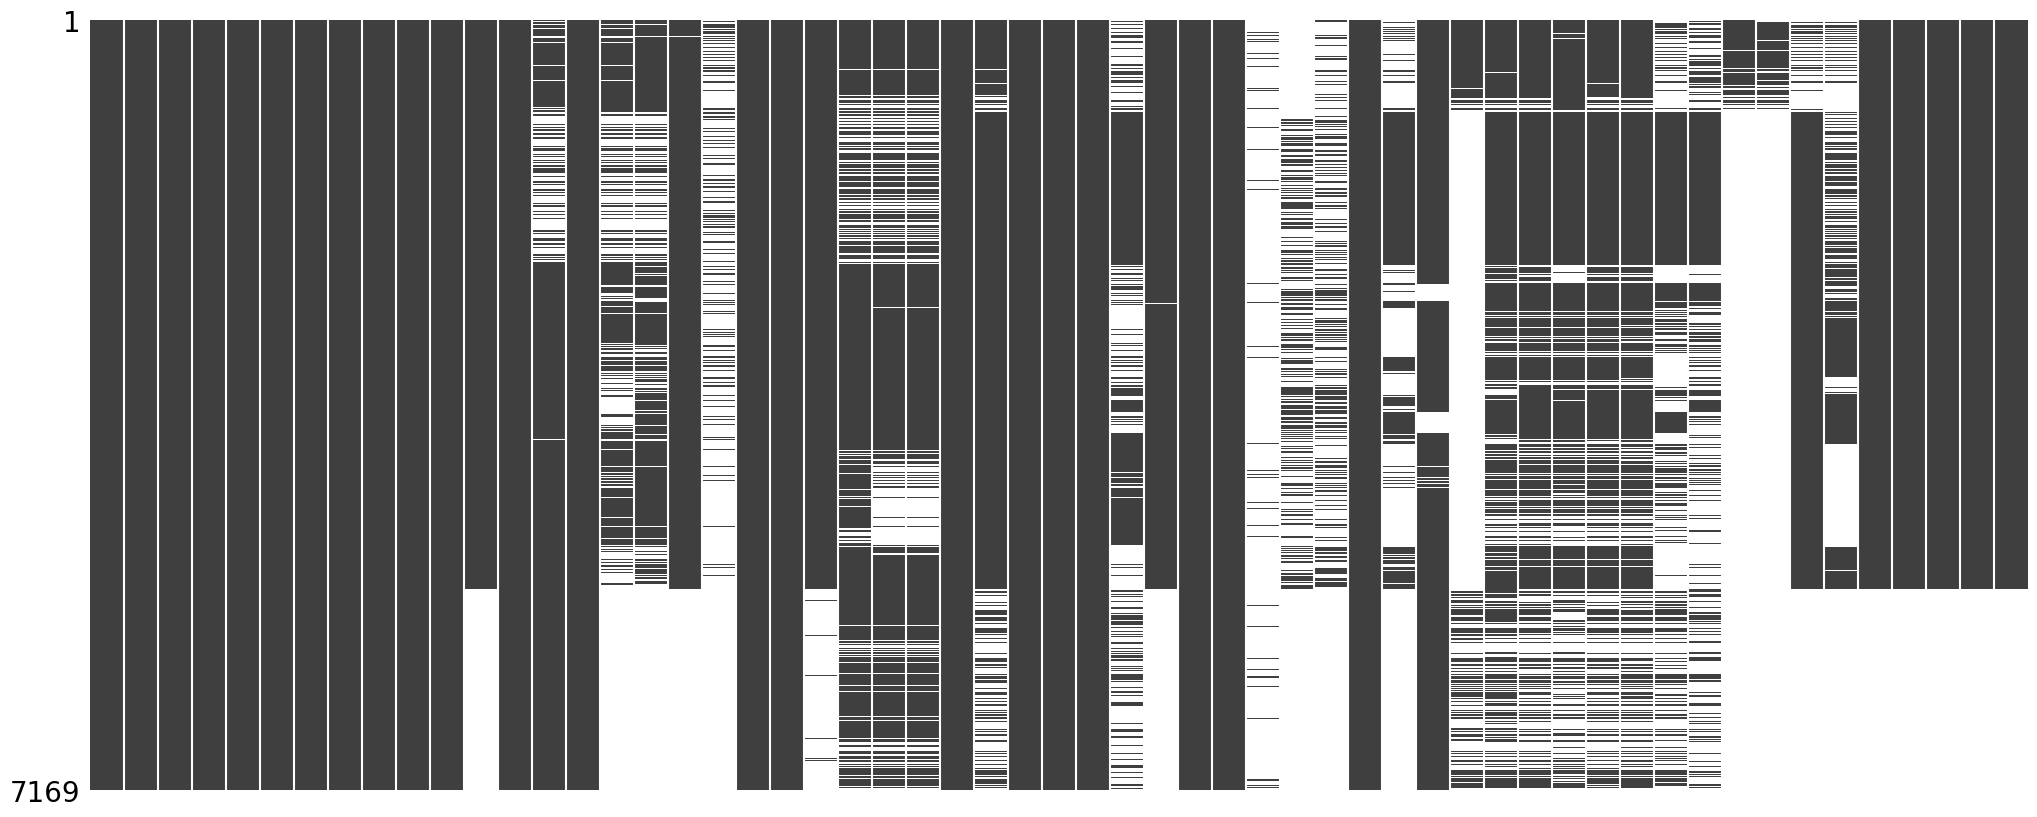

In [14]:
msno.matrix(df_clean, sparkline=False)
print("*************** {} ***************".format(df_clean.name))
print(df_clean.info())
print(df_clean.describe(include="all").T)

## **TRANSFORMED DATA FRAME**

------------------------------------------------
Transforming...


f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
f:\U\pdg\CKD_Predictor\.env\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Grupo de Riesgo                                                       False
CodDepto                                                              False
FechaNovedadFallecido                                                 False
Edad                                                                   True
Cod_Género                                                            False
Tipo de Discapacidad                                                  False
Condición de Discapacidad                                             False
Pertenencia Étnica                                                    False
Coomorbilidad                                                         False
ADHERENCIA AL TRATAMIENTO                                             False
Fumador Activo                                                        False
CONSUMO DE ALCOHOL                                                     True
ENTREGA DE MEDICAMENTO OPORTUNA                                       False
FARMACOS ANT

f:\U\pdg\CKD_Predictor\src\data_preprocessing\transforming.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calculo_ERC'][i] = 3.2
f:\U\pdg\CKD_Predictor\src\data_preprocessing\transforming.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calculo_ERC'][i] = 3.1
f:\U\pdg\CKD_Predictor\src\data_preprocessing\transforming.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calculo_ERC'][i] = 1
f:\U\pdg\CKD_Predicto

COLUMS DROPPED:  [('PERIMETRO ABDOMINAL', 63.73273817826754), ('HDL ALTO', 73.83177570093459), ('COLESTEROL ALTO', 75.7567303668573), ('PRESION ARTERIAL', 94.51806388617659)]
Integer encoding for column 'Grupo de Riesgo': {'POBLACIÓN CON RIESGO O ALTERACIONES CARDIO – CEREBRO – VASCULAR – METABÓLICAS MANIFIESTAS': 0.0}
Integer encoding for column 'FechaNovedadFallecido': {1: 0.0}
Integer encoding for column 'ADHERENCIA AL TRATAMIENTO': {1: 0.0, 0: 1.0, 'SIN DATO': 2.0}
Integer encoding for column 'CONSUMO DE ALCOHOL': {'NO': 0.0, 'SI': 1.0}
Integer encoding for column 'ENTREGA DE MEDICAMENTO OPORTUNA': {'SI': 0.0, 'SIN DATO': 1.0, 'NO': 2.0}
Integer encoding for column 'ESTATINA': {'NO': 0.0, 'SI': 1.0, 'SIN DATO': 2.0}
Integer encoding for column 'Clasificación de RCV Global': {'INTERMEDIO': 0.0, 'MUY ALTO': 1.0, 'ALTO': 2.0, 'LATENTE': 3.0, 'SIN DATO': 4.0}
Integer encoding for column 'CLASIFICACION DIABETES': {'TIPO II': 0.0, 'TIPO I': 1.0, 'INDETERMINADO': 2.0}
Integer encoding for

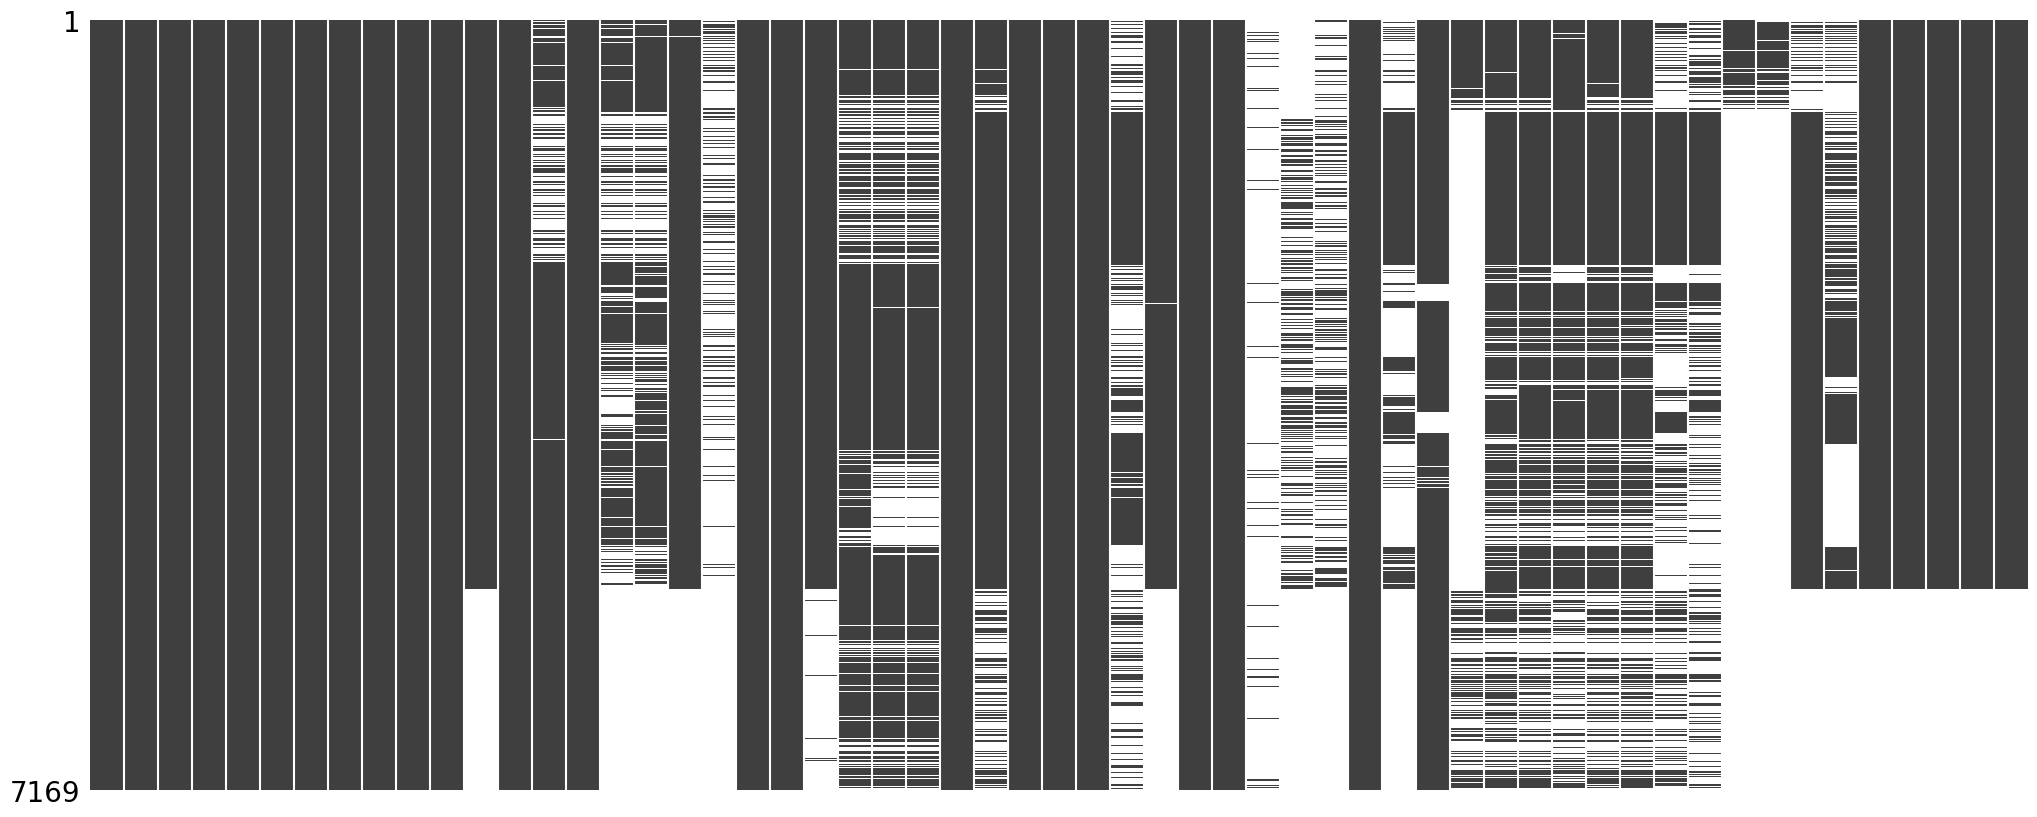

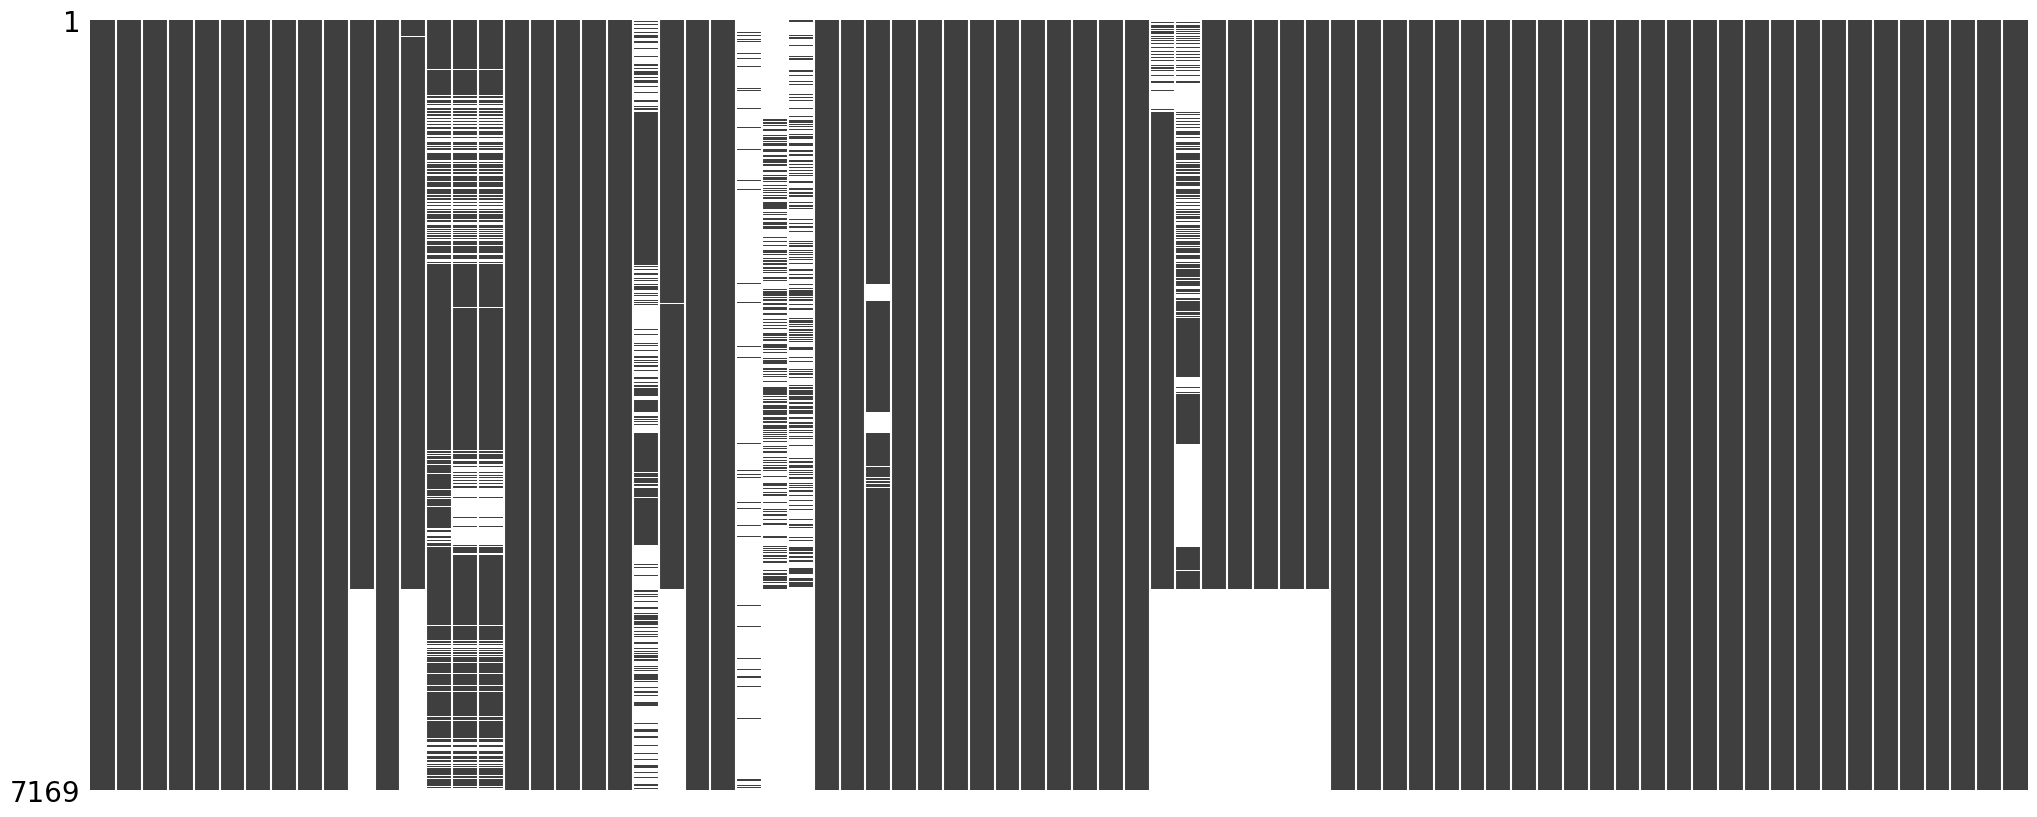

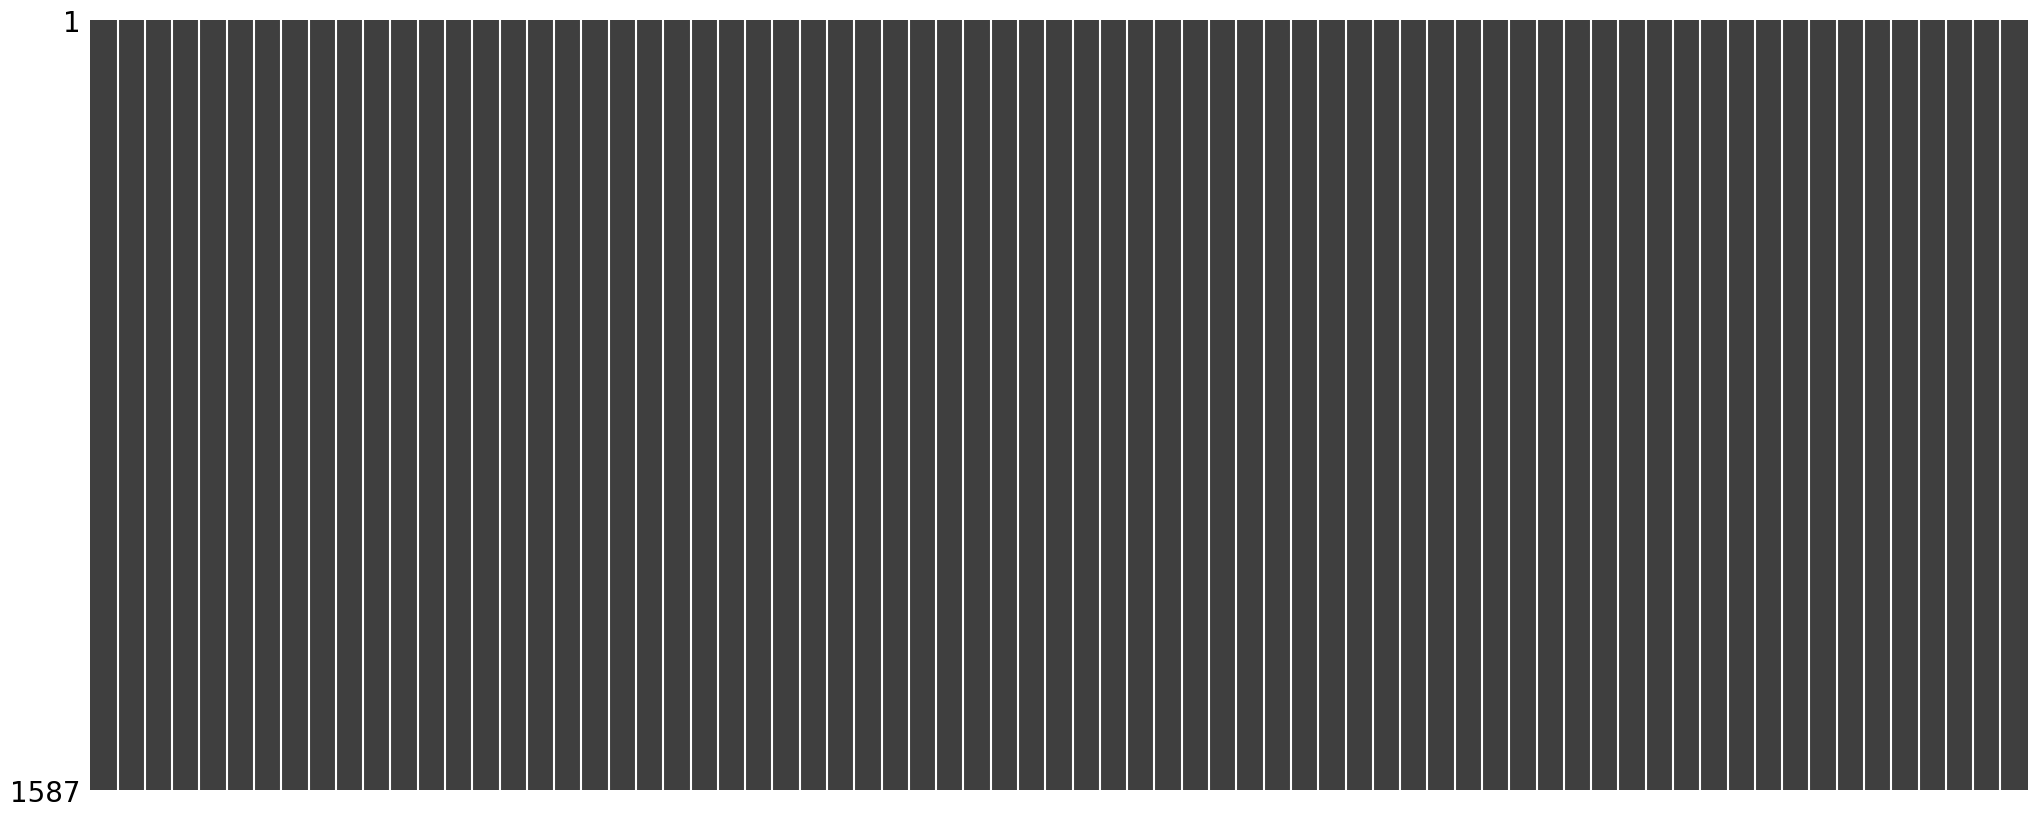

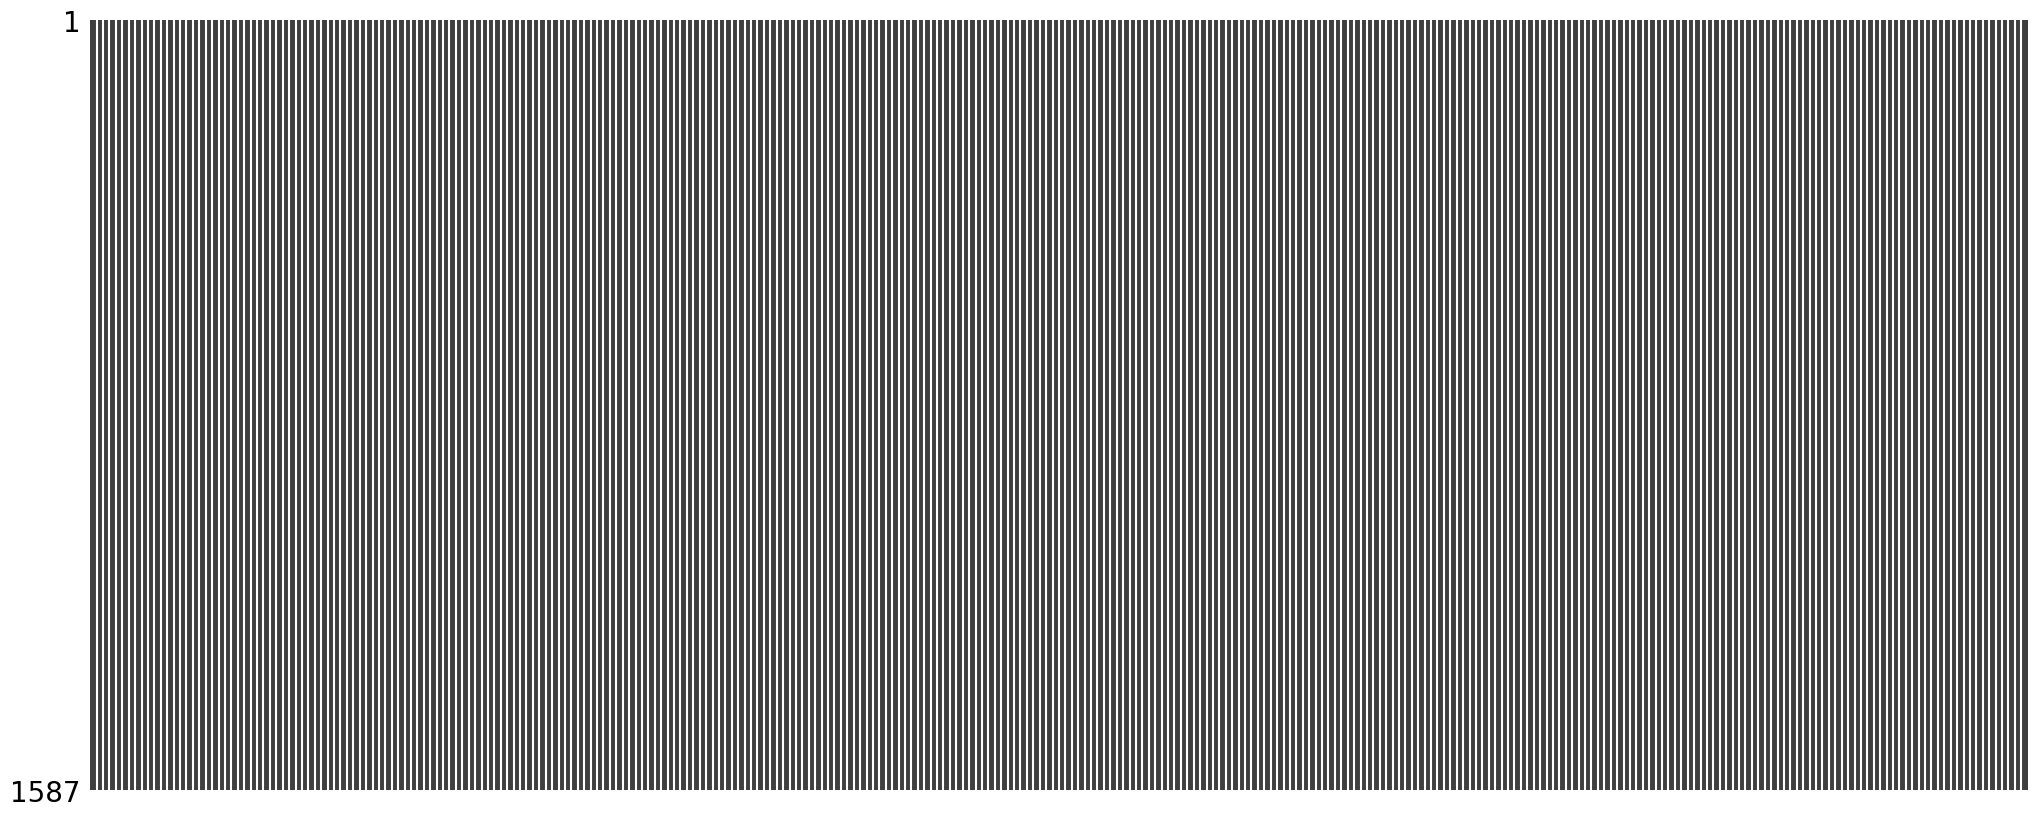

In [15]:
tr.run()
transformed_df = tr.get_df_transformed()
transformed_df.name = 'transformed df' 
X_train = tr.get_x_train_transformed()
X_train.name = 'X_train df' 
X_val = tr.get_x_val_transformed()
X_val.name = 'X_val df'
X_test = tr.get_x_test_transformed()
X_test.name = 'X_test df'
y_val = tr.get_y_val_transformed()
y_val.name = 'y_val df'
y_test = tr.get_y_test_transformed()
y_test.name = 'y_test df'
y_train = tr.get_y_train_transformed()
y_train.name = 'y_train df'


### **TRANSFORMED DF**

In [16]:
print(transformed_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 15 to 5271
Data columns (total 302 columns):
 #    Column                                                                                                                                                                                                                                                                                           Dtype  
---   ------                                                                                                                                                                                                                                                                                           -----  
 0    Grupo de Riesgo                                                                                                                                                                                                                                                                        

### **Colums after fixing**

In [17]:
print_col_info(transformed_df,  list(transformed_df))


********************************************************************************
Column: Grupo de Riesgo
Unique values in Grupo de Riesgo column:
[0.]
Total Unique values:
1
Value counts for Grupo de Riesgo column:
0.0    1587
Name: Grupo de Riesgo, dtype: int64
Data type of Grupo de Riesgo column:
float64
********************************************************************************

********************************************************************************
Column: FechaNovedadFallecido
Unique values in FechaNovedadFallecido column:
[0.]
Total Unique values:
1
Value counts for FechaNovedadFallecido column:
0.0    1587
Name: FechaNovedadFallecido, dtype: int64
Data type of FechaNovedadFallecido column:
float64
********************************************************************************

********************************************************************************
Column: Edad
Unique values in Edad column:
[ 66.  69.  57.  49.  40.  56.  65.  98.  53.  58.  46.  52.  41.

*************** transformed df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 15 to 5271
Columns: 302 entries, Grupo de Riesgo to FARMACOS_SIN DATO + NO APLICA + NO + NO + NO APLICA
dtypes: float64(41), int64(24), uint8(237)
memory usage: 1.2 MB
None
                                                     count         mean  \
Grupo de Riesgo                                     1587.0     0.000000   
FechaNovedadFallecido                               1587.0     0.000000   
Edad                                                1587.0    64.860113   
Cod_Género                                          1587.0     1.651544   
ADHERENCIA AL TRATAMIENTO                           1587.0     0.017013   
Fumador Activo                                      1587.0     0.013233   
CONSUMO DE ALCOHOL                                  1587.0     0.005671   
ENTREGA DE MEDICAMENTO OPORTUNA                     1587.0     0.006931   
ESTATINA                                 

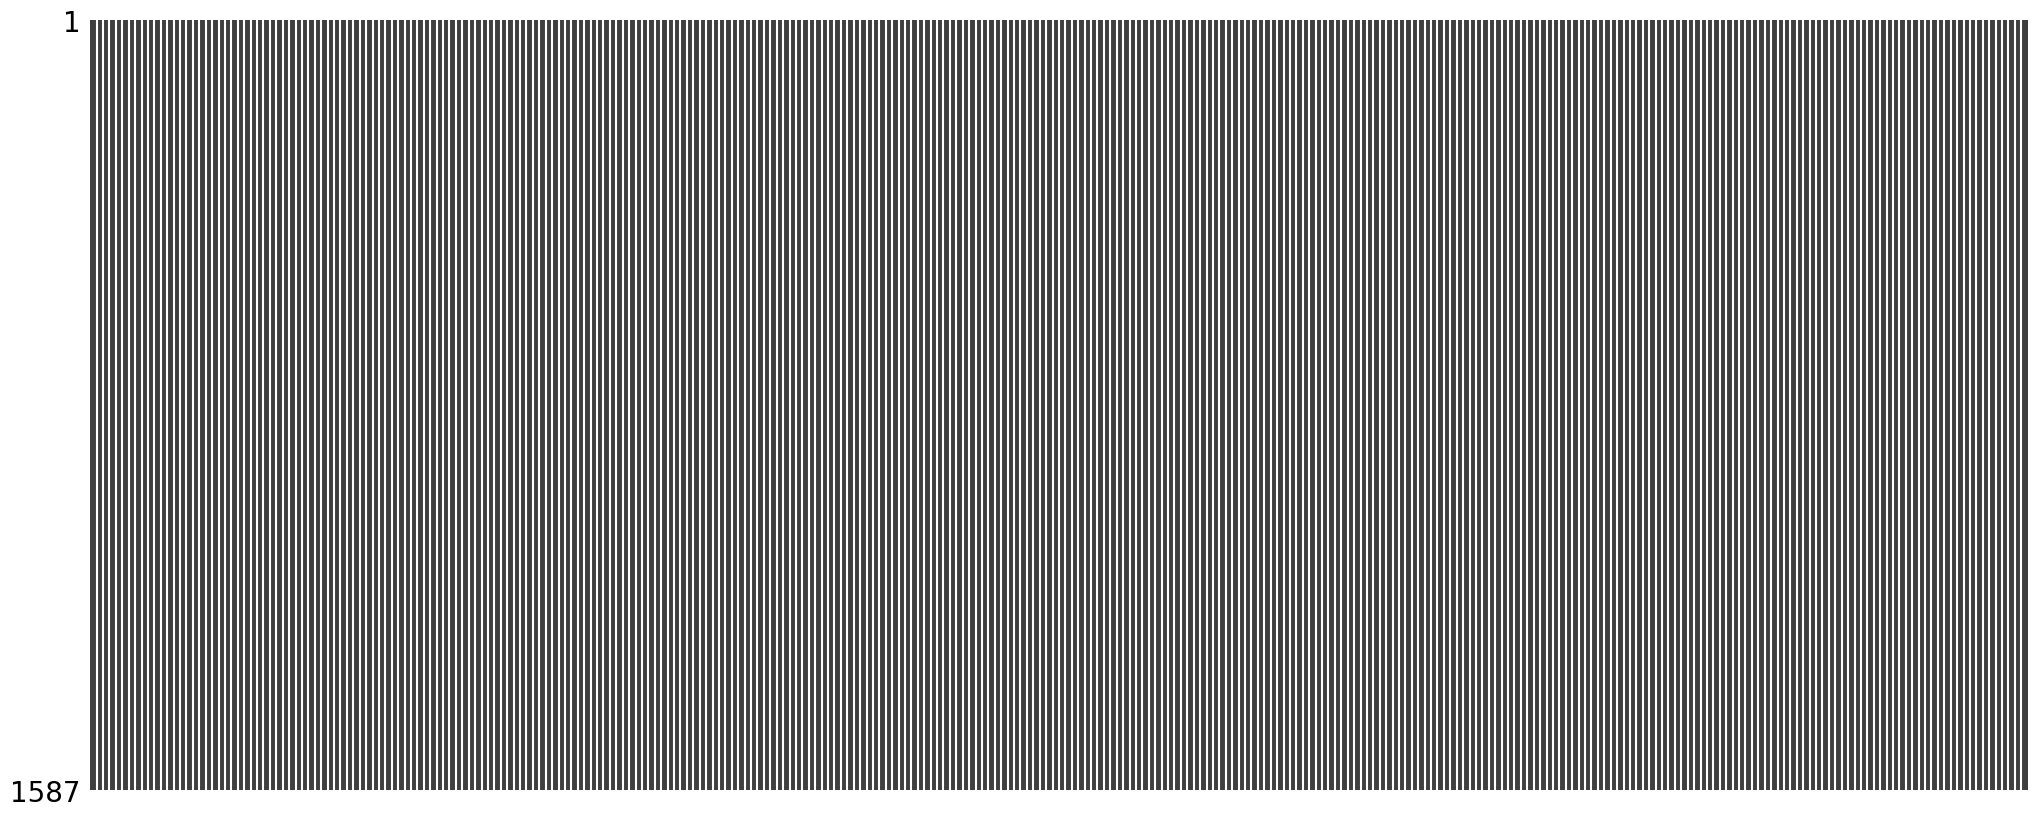

In [18]:
msno.matrix(transformed_df, sparkline=False)
print("*************** {} ***************".format(transformed_df.name))
print(transformed_df.info())
print(transformed_df.describe(include="all").T)

In [19]:
print("*************** {} ***************".format(X_train.name))
print(X_train.info())
print(X_train.describe(include="all").T)

*************** X_train df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 2047 to 4067
Columns: 301 entries, Grupo de Riesgo to FARMACOS_SIN DATO + NO APLICA + NO + NO + NO APLICA
dtypes: float64(40), int64(24), uint8(237)
memory usage: 703.0 KB
None
                                                    count         mean  \
Grupo de Riesgo                                     951.0     0.000000   
FechaNovedadFallecido                               951.0     0.000000   
Edad                                                951.0    64.651945   
Cod_Género                                          951.0     1.649842   
ADHERENCIA AL TRATAMIENTO                           951.0     0.015773   
Fumador Activo                                      951.0     0.009464   
CONSUMO DE ALCOHOL                                  951.0     0.004206   
ENTREGA DE MEDICAMENTO OPORTUNA                     951.0     0.008412   
ESTATINA                                           

In [20]:
print("*************** {} ***************".format(X_val.name))
print(X_val.info())
print(X_val.describe(include="all").T)

*************** X_val df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 1471 to 2657
Columns: 301 entries, Grupo de Riesgo to FARMACOS_SIN DATO + NO APLICA + NO + NO + NO APLICA
dtypes: float64(40), int64(24), uint8(237)
memory usage: 235.1 KB
None
                                                    count         mean  \
Grupo de Riesgo                                     318.0     0.000000   
FechaNovedadFallecido                               318.0     0.000000   
Edad                                                318.0    66.305031   
Cod_Género                                          318.0     1.613208   
ADHERENCIA AL TRATAMIENTO                           318.0     0.018868   
Fumador Activo                                      318.0     0.018868   
CONSUMO DE ALCOHOL                                  318.0     0.006289   
ENTREGA DE MEDICAMENTO OPORTUNA                     318.0     0.000000   
ESTATINA                                            3

In [21]:
print("*************** {} ***************".format(X_test.name))
print(X_test.info())
print(X_test.describe(include="all").T)

*************** X_test df ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 1813 to 3030
Columns: 301 entries, Grupo de Riesgo to FARMACOS_SIN DATO + NO APLICA + NO + NO + NO APLICA
dtypes: float64(40), int64(24), uint8(237)
memory usage: 235.1 KB
None
                                                    count         mean  \
Grupo de Riesgo                                     318.0     0.000000   
FechaNovedadFallecido                               318.0     0.000000   
Edad                                                318.0    64.037736   
Cod_Género                                          318.0     1.694969   
ADHERENCIA AL TRATAMIENTO                           318.0     0.018868   
Fumador Activo                                      318.0     0.018868   
CONSUMO DE ALCOHOL                                  318.0     0.009434   
ENTREGA DE MEDICAMENTO OPORTUNA                     318.0     0.009434   
ESTATINA                                            

In [22]:
print("*************** {} ***************".format(y_train.name))
print(y_train.info())
print(y_train.describe(include="all").T)

*************** y_train df ***************
<class 'pandas.core.series.Series'>
Int64Index: 951 entries, 2047 to 4067
Series name: y_train df
Non-Null Count  Dtype  
--------------  -----  
951 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB
None
count    951.000000
mean       3.825552
std        1.316650
min        1.000000
25%        3.100000
50%        5.000000
75%        5.000000
max        5.000000
Name: y_train df, dtype: float64


In [23]:
print("*************** {} ***************".format(y_val.name))
print(y_val.info())
print(y_val.describe(include="all").T)

*************** y_val df ***************
<class 'pandas.core.series.Series'>
Int64Index: 318 entries, 1471 to 2657
Series name: y_val df
Non-Null Count  Dtype  
--------------  -----  
318 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
None
count    318.000000
mean       3.803459
std        1.363340
min        1.000000
25%        3.100000
50%        5.000000
75%        5.000000
max        5.000000
Name: y_val df, dtype: float64


In [24]:
print("*************** {} ***************".format(y_test.name))
print(y_test.info())
print(y_test.describe(include="all").T)

*************** y_test df ***************
<class 'pandas.core.series.Series'>
Int64Index: 318 entries, 1813 to 3030
Series name: y_test df
Non-Null Count  Dtype  
--------------  -----  
318 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
None
count    318.000000
mean       3.882704
std        1.352804
min        1.000000
25%        3.100000
50%        5.000000
75%        5.000000
max        5.000000
Name: y_test df, dtype: float64


# **MODELS**

In [25]:
data_split_paths = {
    "X_train": '../../data/processed/transformed_data/X_train.csv',
    "X_test": '../../data/processed/transformed_data/X_test.csv',
    "y_train": '../../data/processed/transformed_data/y_train.csv',
    "y_test": '../../data/processed/transformed_data/y_test.csv'
}

## **XGB**

In [26]:
xgb_model = XGBModel(X_train, y_train, X_test, X_val, y_test, y_val)
pred, model = xgb_model.run()

print(pred)
print(model)

TypeError: XGBModel.__init__() missing 1 required positional argument: 'param_grid'

In [ ]:
"""
 "********************************************heatmap of missingness********************************************"
    msno.matrix(df_clean);
    plt.title("heatmap of missingness")
    plt.show()
    
    print("****************************** Correlation matrix ******************************")
    def plot_correlation_matrix(df, graph_width):
        df = df.dropna('columns') # drop columns with NaN
        df = df[[col for col in df if df[col].nunique() > 1]]
        if df.shape[1] < 2:
            print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
            return
        corr = df.corr()
        plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor='w', edgecolor='k')
        corrMat = plt.matshow(corr, fignum=1)
        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
        plt.yticks(range(len(corr.columns)), corr.columns)
        plt.gca().xaxis.tick_bottom()
        plt.colorbar(corrMat)
        plt.title(f'Correlation Matrix for ', fontsize=15)
        plt.tick_params(labelsize=10)
        plt.title('Correlation Matrix', fontsize=1)
        plt.show()
        print(corr)


    print(df_clean.corr())
    plot_correlation_matrix(df_clean, 100)
    
    '../../data/processed/cleaned_data/Cleaned_data.csv'
"""


'\n "********************************************heatmap of missingness********************************************"\n    msno.matrix(df_clean);\n    plt.title("heatmap of missingness")\n    plt.show()\n    \n    print("****************************** Correlation matrix ******************************")\n    def plot_correlation_matrix(df, graph_width):\n        df = df.dropna(\'columns\') # drop columns with NaN\n        df = df[[col for col in df if df[col].nunique() > 1]]\n        if df.shape[1] < 2:\n            print(f\'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2\')\n            return\n        corr = df.corr()\n        plt.figure(num=None, figsize=(graph_width, graph_width), dpi=80, facecolor=\'w\', edgecolor=\'k\')\n        corrMat = plt.matshow(corr, fignum=1)\n        plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)\n        plt.yticks(range(len(corr.columns)), corr.columns)\n        plt.gca().xaxis.tick_bot